Для исследования возьмем задачу по определению рыночной стоимости автомобиля. Набор данных Car Price Prediction Challenge взят с Kaggle: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/code.

# Импортирование библиотек

In [ ]:
! pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 149 kB 32.4 MB/s 
     |████████████████████████████████| 48 kB 6.0 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 210 kB 12.2 MB/s 
     |████████████████████████████████| 61 kB 438 kB/s 
     |████████████████████████████████| 274 kB 42.7 MB/s 
     |████████████████████████████████| 802 kB 47.9 MB/s 
     |████████████████████████████████| 132 kB 45.4 MB/s 
     |████████████████████████████████| 1.0 MB 38.2 MB/s 
     |████████████████████████████████| 54.5 MB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 36.5 MB/s 
     |████████████████████████████████| 291 kB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 41.7 MB/s 
     |████████████████████████████████| 4.4 MB 42.7 MB/s 
     |████████████████████████████████|

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 28.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Загрузка набора данных Car Price Prediction 

In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Colab_Notebook_Julia/car_price_prediction.csv')

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  object 
 1   Price             19227 non-null  float64
 2   Levy              19227 non-null  object 
 3   Manufacturer      19227 non-null  object 
 4   Model             19227 non-null  object 
 5   Prod. year        19227 non-null  float64
 6   Category          19227 non-null  object 
 7   Leather interior  19227 non-null  object 
 8   Fuel type         19227 non-null  object 
 9   Engine volume     19227 non-null  object 
 10  Mileage           19227 non-null  object 
 11  Cylinders         19227 non-null  float64
 12  Gear box type     19227 non-null  object 
 13  Drive wheels      19227 non-null  object 
 14  Doors             19227 non-null  object 
 15  Wheel             19227 non-null  object 
 16  Color             19227 non-null  object

In [ ]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12.0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8.0
2,45774419,8467.0,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2.0
3,45769185,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0.0
4,45809263,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0


## Описание набора данных

*Признаки*

* ID                - номер заказа

* Levy              - налог

* Manufacturer      - марка автомобиля

* Model             - модель автомобиля

* Prod. year        - год изготовления

* Category          - тип кузова

* Leather interior  - кожаный салон

* Fuel type         - тип топлива

* Engine volume     - объем двигателя

* Mileage           - пробег

* Cylinders         - количество цилиндров

* Gear box type     - коробка передач

* Drive wheels      - тип привода

* Doors             - количество дверей

* Wheel             - расположение руля

* Color             - цвет

* Airbags           - количество подушек безопасности

*Целевой признак*

Price             - цена ($)

Найдем топ-10 популярных производителей и их среднюю стоимость на автомоибли.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


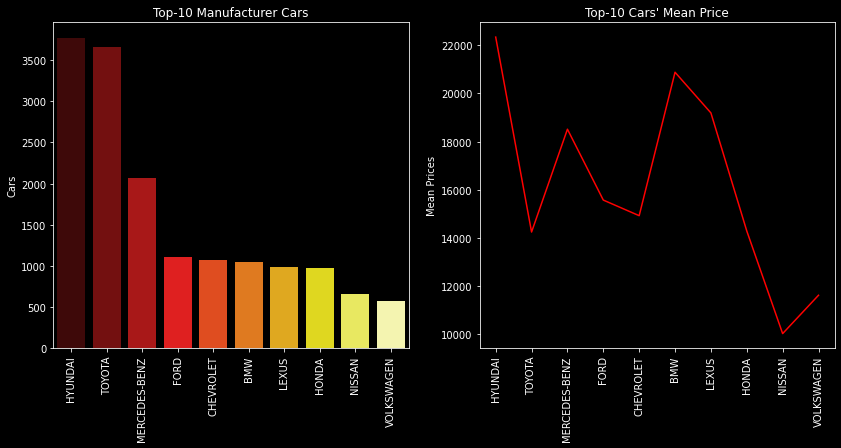

In [ ]:
top10_cars = cars['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [cars[cars['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

# dark theme for plot
plt.style.use('dark_background')

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(top10_cars.index, top10_cars.values, palette='hot');
plt.xticks(rotation = 90)
plt.ylabel('Cars')
plt.title('Top-10 Manufacturer Cars');

ax2 = fig.add_subplot(122)
sns.lineplot(top10_cars.index, top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top-10 Cars' Mean Price")
plt.show();

# Предобработка данных

Удалим первый столбец, содержащий номер товара (ID) - этот набор цифр явно не влияет на прогноз стоимости автомобиля.

In [ ]:
#удаляем первый столбец
cars_new = cars.drop(labels = 'ID', axis=1)

## Удаление дубликатов

Проверим наличие дубликатов в наборе данных.

In [ ]:
print('Количество явных дубликатов:', cars_new.duplicated().sum())

Количество явных дубликатов: 3521


Уберем явные дубликаты из данных.

In [ ]:
cars_dupl = cars_new.drop_duplicates()

In [ ]:
cars_dupl.shape

(15716, 17)

In [ ]:
print(f'Набор данных сократился на {1 - cars_dupl.shape[0] / cars.shape[0]:.0%}')
print('Количество явных дубликатов:', cars_dupl.duplicated().sum())

Набор данных сократился на 18%
Количество явных дубликатов: 0


## Удаление пропущенных значений

In [ ]:
cars_dupl.isna().values.any()

True

В датасете присутствуют пропущенные значения. Исследуем их и удалим. 

In [ ]:
cars_dupl[cars_dupl.isna().values.any(axis=1)]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cars_upd = cars_dupl.dropna()
cars_upd.shape

(15715, 17)

## Работа с данными в столбцах

### Doors

In [ ]:
cars_upd['Doors'].value_counts()

04-May    14846
02-Mar      745
>5          124
Name: Doors, dtype: int64

Значения в столбце Количество дверей (Doors) содержит неправильные значения 04-May и 02-Mar. Исправим ошибку.

In [ ]:
cars_upd.loc[:,'Doors'] = cars_upd.loc[:,'Doors'].str.replace('04-May','4-5')
cars_upd.loc[:,'Doors'] = cars_upd.loc[:,'Doors'].str.replace('02-Mar','2-3')
cars_upd['Doors'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


4-5    14846
2-3      745
>5       124
Name: Doors, dtype: int64

### Налог (Levy)

In [ ]:
cars_upd['Levy'].value_counts()

-       5679
891      387
765      387
639      340
640      336
        ... 
2177       1
5666       1
3156       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

В колонке Налог (Levy) есть символ "-". Делаем предположение: это обозначение отсутствия налога при продаже. Замним эти пропуски нулями "0".

In [ ]:
cars_upd.loc[:,"Levy"]=cars_upd.loc[:,"Levy"].replace({"-":"0"})
cars_upd.loc[:,'Levy'] = cars_upd.loc[:,'Levy'].apply(lambda x : int(x))
cars_upd['Levy'].describe()

count    15715.000000
mean       561.503213
std        559.271646
min          0.000000
25%          0.000000
50%        639.000000
75%        862.000000
max      11714.000000
Name: Levy, dtype: float64

In [ ]:
print(cars_upd['Levy'].dtype)

int64


### Год производства 

In [ ]:
cars_upd.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-5,Left wheel,Silver,12.0
1,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8.0
2,8467.0,0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4-5,Right-hand drive,Black,2.0
3,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-5,Left wheel,White,0.0
4,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4-5,Left wheel,Silver,4.0


Год производства, как число, не информативен при прогназировании. Заменим на возраст автомобиля.

In [ ]:
def age(row):
  age = (2020-row['Prod. year'])
  return age

In [ ]:
cars_upd['Age'] = cars_upd.apply(age, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cars_upd = cars_upd.drop(labels = 'Prod. year', axis=1)
cars_upd.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328.0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-5,Left wheel,Silver,12.0,10.0
1,16621.0,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8.0,9.0
2,8467.0,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4-5,Right-hand drive,Black,2.0,14.0
3,3607.0,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-5,Left wheel,White,0.0,9.0
4,11726.0,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4-5,Left wheel,Silver,4.0,6.0


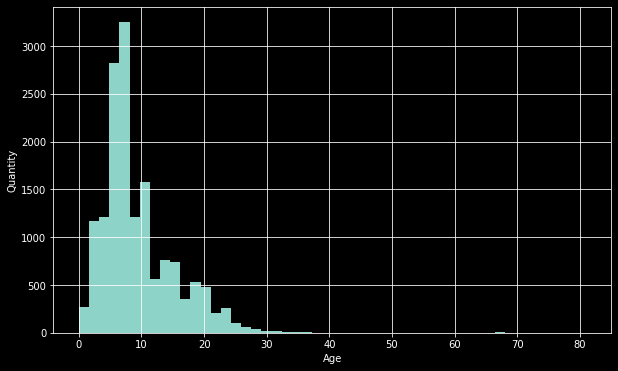

In [ ]:
plt.figure(figsize=[10,6])
ax = cars_upd['Age'].hist(bins=50)
ax.set_xlabel('Age')
ax.set_ylabel('Quantity');

In [ ]:
cars_upd['Age'].describe()

count    15715.000000
mean         9.481260
std          6.012657
min          0.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         81.000000
Name: Age, dtype: float64

### Объем двигателя

Столбец Объем двигателя (Engine volume) содержит слишком много значений, также в некоторых случаях используется слово Turbo.

In [ ]:
cars_upd['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

Создадим новый бинарный признак turbo (Yes/No) для опредления типа двигателя. Сначала заполним для всех No.

In [ ]:
cars_upd['turbo'] = 'No'

In [ ]:
cars_upd.head(5)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,turbo
0,13328.0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4-5,Left wheel,Silver,12.0,10.0,No
1,16621.0,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8.0,9.0,No
2,8467.0,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4-5,Right-hand drive,Black,2.0,14.0,No
3,3607.0,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4-5,Left wheel,White,0.0,9.0,No
4,11726.0,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4-5,Left wheel,Silver,4.0,6.0,No


Определим индексы объектов с типом Turbo. Заполним для них признак, как Yes.

In [ ]:

idx_turbo = cars_upd[cars_upd['Engine volume'].str.contains('Turbo')].index
print('Кол-во авто с двигателем Turbo:', len(idx_turbo))

Кол-во авто с двигателем Turbo: 1885


In [ ]:
cars_upd.loc[idx_turbo, 'turbo'] = 'Yes'

Проверим результат.

In [ ]:
RANDOM_STATE = 123

cars_upd[['Engine volume', 'turbo']].sample(5, random_state=RANDOM_STATE)

,Engine volume,turbo
573,4.4 Turbo,Yes
15246,1.8,No
15069,2.0 Turbo,Yes
7134,1.8,No
14412,1.6,No


In [ ]:
cars_upd[cars_upd['turbo'] == 'Yes'].shape[0]

1885

Преобразование прошло корректно.

Уберем слово Turbo из "Engine volume".

In [ ]:
cars_upd.loc[:,'Engine volume'] = cars_upd.loc[:,'Engine volume'].apply(lambda x : str(x).replace(" Turbo",""))
cars_upd.loc[:,'Engine volume'] = cars_upd.loc[:,'Engine volume'].apply(lambda x : float(x))
print(sorted(cars_upd['Engine volume'].unique()))


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 5.0, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.2, 6.3, 6.4, 6.7, 6.8, 7.3, 20.0]


### Пробег

Удалим из значений столбца Пробег (Mileage) слово "km", чтобы использовать его в модели как числовой признак.

In [ ]:
cars_upd.loc[:,'Mileage'] = cars_upd.loc[:,'Mileage'].apply(lambda x : str(x).replace("km"," "))
cars_upd.loc[:,'Mileage'] = cars_upd.loc[:,'Mileage'].astype(str).astype(int)
cars_upd['Mileage'].describe().apply(lambda x: format(x, 'f'))

count         15715.000000
mean        1837501.705632
std        53549488.795858
min               0.000000
25%           66566.500000
50%          121000.000000
75%          180000.000000
max      2147483647.000000
Name: Mileage, dtype: object

# EDA 

Для дальнейшей работы с данными преобразуем названия столбцов в "змеиный регистр".

In [ ]:
cars_upd.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower().replace(' ', '_') for name in cars_upd.columns]

In [ ]:
cars_upd.columns

Index(['price', 'levy', 'manufacturer', 'model', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags', 'age', 'turbo'],
      dtype='object')

## Поиск аномалий

Поиск аномалий в наборе данных позволит удалить уникальные автомобили, стоимость которых должна рассматриваться по отдельности для каждого конкретного случая.  

Рассмотрим возраст автомобиля (Age).

In [ ]:
fig = px.box(cars_upd, x='age', orientation="h", notched=True)
fig.update_layout(height=300, width=900)

Удалим выбросы: машины старше 40 лет. Количество машин старше незначительно.

In [ ]:
cars_filter = cars_upd.query('0<=age<41')

In [ ]:
cars_filter.shape

(15693, 18)

Следующий признак для исследования - объем двигателя (Engine volume).

In [ ]:
fig = px.box(cars_filter, x="engine_volume", orientation="h", notched=True)
fig.update_layout(height=300, width=900)
fig.show()

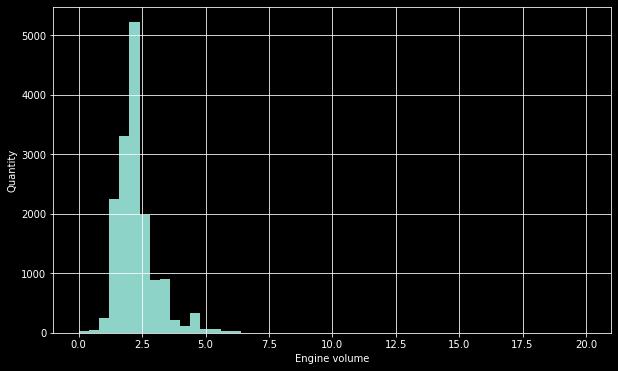

In [ ]:
plt.figure(figsize=[10,6])
ax = cars_upd['engine_volume'].hist(bins=50)
ax.set_xlabel('Engine volume')
ax.set_ylabel('Quantity');

Из графиков видно, что рассматривать автомобили с объемом двигателя (Engine volume) больше 7 л нецелеобразно.

In [ ]:
cars_filter = cars_filter.query('1<engine_volume<7')

In [ ]:
cars_filter.shape

(15497, 18)

Следующий признак для исследования - levy.

In [ ]:
fig = px.box(cars_filter, x="levy", orientation="h", notched=True)
fig.update_layout(height=300, width=900)
fig.show()

Удалим из данных автомобили более 2500.

In [ ]:
cars_filter = cars_filter.query('levy<2500')

Следующий признак для исследования - пробег, mileage.

In [ ]:
fig = px.box(cars_filter, x="mileage", orientation="h", notched=True)
fig.update_layout(height=300, width=900)
fig.show()

In [ ]:
lower = cars_filter['mileage'].quantile(.025)
upper = cars_filter['mileage'].quantile(.975)

print(f'95% доверительный интервал пробега от {lower:.0f} км до {upper:.0f} км')

95% доверительный интервал пробега от 0 км до 384090 км


Удалим из данных автомобили с пробегом более 385000 км.

In [ ]:
cars_filter = cars_filter.query('mileage<385000')

Также не будем верить сверхнизким и аномально высоким стоимостям (Price) автомобиля. 


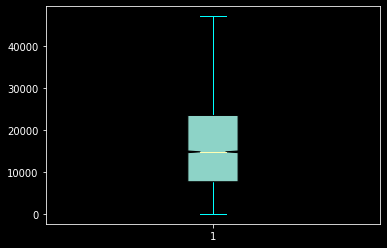

In [ ]:
c = 'cyan'
plt.boxplot(cars_filter['price'], notch=True, patch_artist=True,
                    capprops=dict(color=c), whiskerprops=dict(color=c), 
                    flierprops=dict(markeredgecolor=c), showfliers=0);

In [ ]:
lower = cars_filter['price'].quantile(.025)
upper = cars_filter['price'].quantile(.975)

print(f'95% доверительный интервал стоимости от {lower:.0f} евро до {upper:.0f} $')

95% доверительный интервал стоимости от 157 евро до 64463 $


Удалим из данных автомобили стоимостью меньше 100 долларов и выше 64 тыс. долларов.

In [ ]:
cars_filter = cars_filter.query('100<=price<=64000')
cars_filter = cars_filter.reset_index(drop=True)

In [ ]:
cars_filter['price'].describe()

count    14362.000000
mean     17224.939215
std      13133.464403
min        100.000000
25%       7840.000000
50%      14740.000000
75%      22894.000000
max      63976.000000
Name: price, dtype: float64

In [ ]:
cars_filter.shape

(14362, 18)

## Признак с большим количеством значений 

Признак с большим количеством разных значений может отрицательно сказаться на качестве модели. В нашем наборе данных такой признак модель автомобиля (model).

In [ ]:
print('Количество уникальных значений', cars_filter['model'].nunique())

Количество уникальных значений 1441


Делаем гипотезу, что можно убрать модель автомобиля из датасета для лучшей предсказательности.

In [ ]:
#удаляем столбец 'model'
cars_filter = cars_filter.drop(labels = 'model', axis=1)

## Проверка мультиколлинеарности

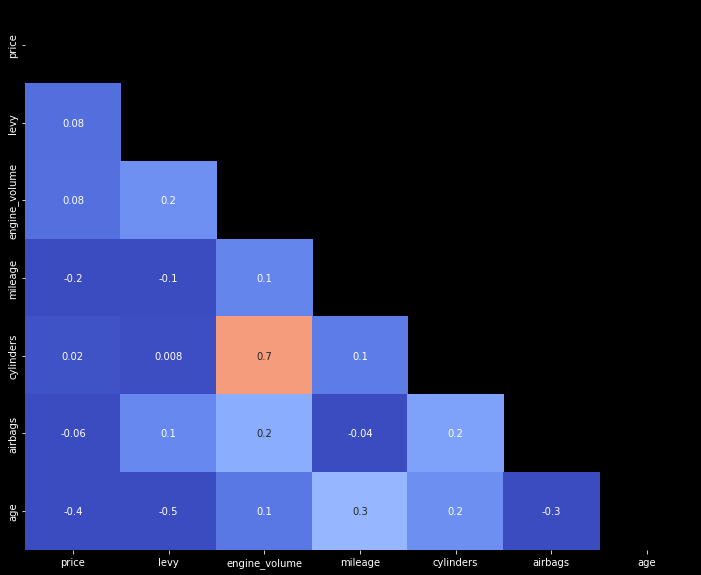

In [ ]:
plt.figure(figsize = (12,10))
matrix = np.triu(cars_filter.corr())
sns.heatmap(cars_filter.corr(),annot = True, fmt='.1g', mask=matrix, vmin=0,
            vmax=1, cmap= 'coolwarm', cbar=0)

Самая высокая корреляция наблюдается между числом цилиндров (cylinders) и объемом двигателя (engine_volume).

Найдем коэффициент корреляции с помощью библиотеки phik — определим меру нелинейной связи между признаками в исходных данных. Определим список числовых признаков как interval_cols. Посчитаем коэффициенты корреляции для признаков и построим тепловую карту.

In [ ]:
numeric_features = ['price', 'levy', 'engine_volume', 'mileage',
                    'cylinders','airbags', 'age']

In [ ]:
# phik matrix
phik_overview = cars_filter.phik_matrix(interval_cols=numeric_features)

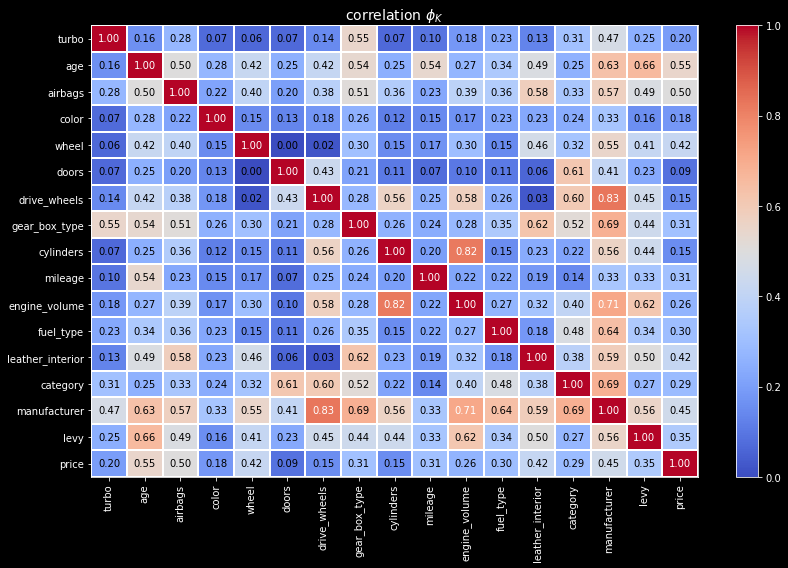

In [ ]:
# heatmap of phik results

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

Рассмотрим распределение значений коэффициентов корреляции:

* Обнаружена сильная связь между признаками manufacturer и drive_wheels, а также между engine_volume и cylinders.

* Признак color показывает нулевую корреляцию, т.е. слабо связан с другими признаками. Это также может помешать обучению модели.

* Целевой признак явно ни с чем не коррелирует. Отметим слабую связь price с doors.

При оценке корреляций следует обратить внимание не только на коэффициенты, но и на их статистическую значимость. Потому что в итоге большая корреляция может оказаться статистически незначимой, и наоборот. Найдем статистическую значимость корреляции с помощью библиотеки phik.

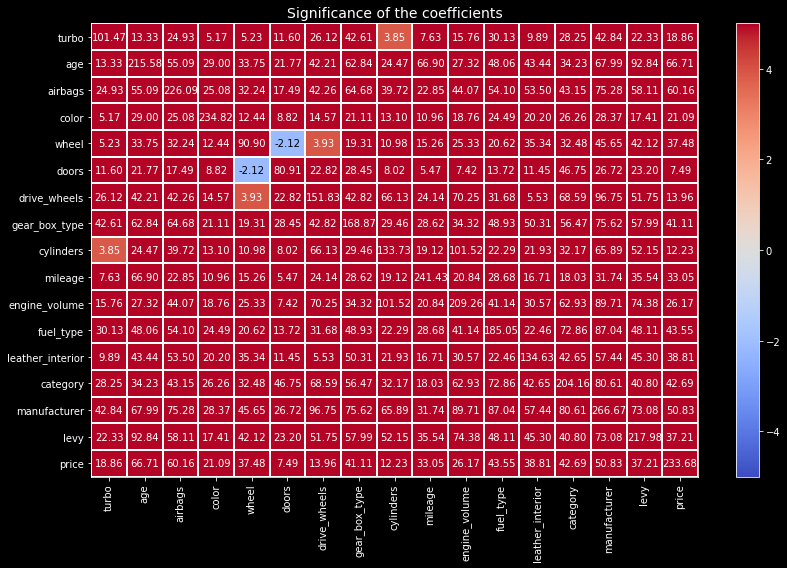

In [ ]:
# phik significance matrix
significance_overview = cars_filter.significance_matrix(interval_cols=numeric_features)

# heatmap of significance results
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, color_map="coolwarm", 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1, figsize=(12, 8))
plt.tight_layout()

Получены относительно высокие значения коэффициента для почти всех признаков, такие - статистически значимы. Поэтому мы можем довериться коэффициентам корреляции из прошлого анализа. 

Уберем из данных признаки:
* color. показывает нулевую корреляцию
* drive_wheels. manufacturer лучше связан с другими признаками
* cylinders. engine_volume лучше связан с другими признаками

Обновим данные и уберем мультикорреальные признаки, построим тепловую карту для проверки результата.

In [ ]:
# remove the features with correlation 
cars_filter = cars_filter.drop(['drive_wheels', 'color', 'cylinders'], axis=1 )

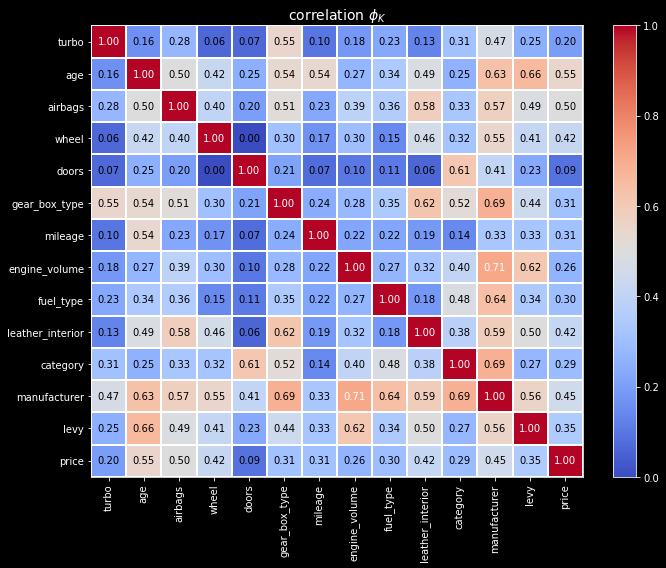

In [ ]:
# updated phik matrix
phik_overview_upd = cars_filter.phik_matrix(interval_cols=numeric_features)

# heatmap of updated phik results
plot_correlation_matrix(phik_overview_upd.values, 
                        x_labels=phik_overview_upd.columns, 
                        y_labels=phik_overview_upd.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

In [ ]:
cars_filter.shape

(14362, 14)

# Обучение моделей

## Кодирование признаков

Признаки содержат категориальные переменные. Применим технику Ordinal Encoding, кодирование по номеру категории, чтобы закодировать цифрами выраженные в тексте категории.

In [ ]:
encoder = OrdinalEncoder()

category = ['manufacturer', 'category', 'leather_interior', 'fuel_type', 
            'gear_box_type', 'wheel', 'doors', 'turbo']
       
cars_ordinal = cars_filter[category]
cars_ordinal = pd.DataFrame(encoder.fit_transform(cars_ordinal),
                            columns=cars_ordinal.columns)

cars_ordinal = cars_ordinal.join(cars_filter[['price', 'levy', 'engine_volume', 
                                              'mileage','airbags', 'age']])

cars_ordinal.head()

,manufacturer,category,leather_interior,fuel_type,gear_box_type,wheel,doors,turbo,price,levy,engine_volume,mileage,airbags,age
0,29.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,13328.0,1399,3.5,186005,12.0,10.0
1,7.0,4.0,0.0,5.0,2.0,0.0,1.0,0.0,16621.0,1018,3.0,192000,8.0,9.0
2,19.0,3.0,0.0,5.0,3.0,1.0,1.0,0.0,8467.0,0,1.3,200000,2.0,14.0
3,14.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,3607.0,862,2.5,168966,0.0,9.0
4,19.0,3.0,1.0,5.0,0.0,0.0,1.0,0.0,11726.0,446,1.3,91901,4.0,6.0


## Определение выборок

Тестовой выборки нет. Значит, данные нужно разбить на две части: обучающую и тестовую. Исходные данные разбиваем в соотношении 3:1. Зафиксируем псевдослучайность для алгоритма обучения, укажем параметр random_state.

In [ ]:
X = cars_ordinal.drop('price',axis=1)
y = cars_ordinal['price']

In [ ]:
# Split the dataset: 75% vs 25% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=RANDOM_STATE)

In [ ]:
X_train.shape

(10771, 13)

In [ ]:
X_test.shape

(3591, 13)

## Масштабирование признаков

В общем случае, значения в столбцах имеют неоднородную размерность. Чтобы алгоритмам было легче обучать модели, признаки приводятся к одному масштабу.

In [ ]:
pd.options.mode.chained_assignment = None

# list of numerical features for scaling
numeric = ['levy', 'engine_volume', 
           'mileage','airbags', 'age']

# fit scaler on train data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
scaler.fit(X_train_scaled[numeric])

# scaling of numeric features
X_train_scaled[numeric] = scaler.transform(X_train_scaled[numeric])
X_test_scaled[numeric] = scaler.transform(X_test_scaled[numeric])

X_train_scaled[numeric].head()

,levy,engine_volume,mileage,airbags,age
6007,0.438982,-0.548070,-0.112050,0.350531,0.097241
3521,-0.044267,-0.817263,-0.585419,-0.638032,-0.620884
1112,1.291407,1.740068,-0.338645,-0.638032,-0.082290
2760,-0.044267,-0.817263,-0.980753,0.844812,-0.620884
8995,1.612882,2.413050,0.118777,1.339093,-0.082290


In [ ]:
X_train_scaled.shape

(10771, 13)

## Случайный лес

Случайный лес для регрессии - это алгортитм, который обучает множество независимых деревьев, а потом принимает решение, усредняя их ответы.

Напишем функцию для обучения модели и расчета метрик ее предсказаний.

In [ ]:
def model_metrics(predict_model, y_test):
    
    mae = np.mean(abs(predict_model-y_test))
    rmse = np.sqrt(np.mean((predict_model-y_test)**2))
    rae = np.mean(abs(predict_model-y_test))/np.mean(abs(y_test-np.mean(y_test)))
    rse = np.mean((predict_model-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
    r2 = r2_score(y_test, predict_model)
    print("The R-squared value: {0:0.4f}".format(r2)) 
    print("Mean Absolute Error: {0:0.1f}".format(mae)) 
    print("Root Mean Squared Error: {0:0.1f}".format(rmse)) 
    print("Relative Absolute Error: {0:0.4f}".format(rae)) 
    print("Relative Squared Error: {0:0.4f}".format(rse))
    return r2 

In [ ]:
rf = RandomForestRegressor(random_state=RANDOM_STATE)

In [ ]:
%%time

rf.fit(X_train_scaled, y_train)
predict_rf = rf.predict(X_test_scaled)

score_rf = model_metrics(predict_rf, y_test)

The R-squared value: 0.7041
Mean Absolute Error: 4483.1
Root Mean Squared Error: 7269.3
Relative Absolute Error: 0.4356
Relative Squared Error: 0.2959
CPU times: user 4 s, sys: 73 ms, total: 4.07 s
Wall time: 4.08 s


Выполним анализ важности признаков выбранной модели.

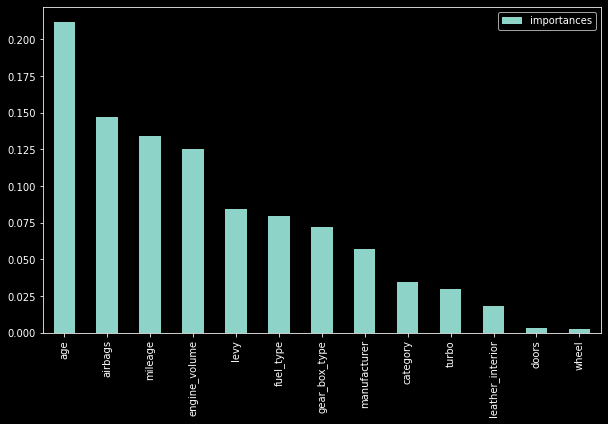

In [ ]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, 
                                     index = X_train_scaled.columns, 
                                     columns=['importances']).sort_values(by='importances', ascending=False)


df_feature_importance.plot(kind='bar', figsize=[10,6]);

## Градиентный бустинг

Градиентный бустинг — это техника машинного обучения для задач регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Это техника использует идею о том, что следующая модель будет учится на ошибках предыдущей с каждой итерацией. 

In [ ]:
gb = GradientBoostingRegressor(random_state=RANDOM_STATE)

In [ ]:
%%time

gb.fit(X_train_scaled, y_train)
predict_gb = gb.predict(X_test_scaled)

score_gb = model_metrics(predict_gb, y_test)

The R-squared value: 0.6282
Mean Absolute Error: 5607.2
Root Mean Squared Error: 8147.9
Relative Absolute Error: 0.5448
Relative Squared Error: 0.3718
CPU times: user 1.16 s, sys: 3 µs, total: 1.16 s
Wall time: 1.16 s


Выполним анализ важности признаков выбранной модели.

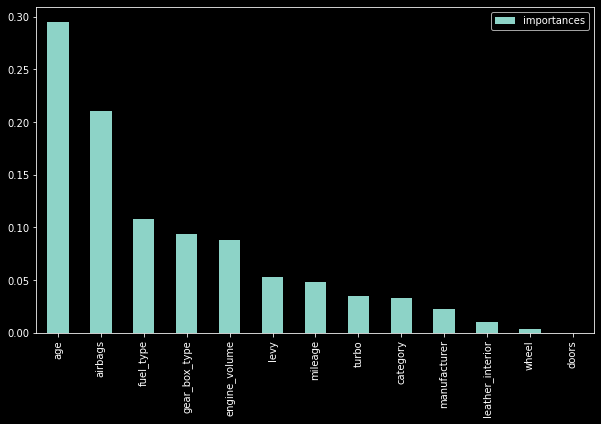

In [ ]:
df_feature_importance = pd.DataFrame(gb.feature_importances_, 
                                     index = X_train_scaled.columns, 
                                     columns=['importances']).sort_values(by='importances', ascending=False)


df_feature_importance.plot(kind='bar', figsize=[10,6]);

## AutoGluon

AutoGluon построен на основе ML-библиотеки Gluon для создания моделей из набора готовых оптимизированных элементов. Он работает с табличными данными и чтобы получить готовую модель, нам потребуется указать, к какому сроку инструмент должен выдать обученную модель — AutoGluon распределит имеющиеся вычислительные мощности так, чтобы за отведённое время найти наиболее эффективную модель.

In [ ]:
time_limit = 60 
metric = 'r2'

In [ ]:
train =  X_train_scaled.join(y_train)
test =  X_test_scaled.join(y_test)

In [ ]:
predictor = TabularPredictor(label='price', eval_metric=metric).fit(train_data = train, time_limit=time_limit, verbosity = 0,presets='best_quality')
predictor.leaderboard(test, silent=True)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221030_144808/"


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.734969,0.734060,3.978894,3.257893,62.923587,0.343521,0.234467,19.337330,2,True,5
1,WeightedEnsemble_L3,0.734969,0.734060,3.980863,3.258618,62.927481,0.001970,0.000725,0.003894,3,True,6
2,WeightedEnsemble_L2,0.734105,0.734698,3.533714,2.819912,43.755483,0.004574,0.000680,0.204969,2,True,4
3,LightGBMXT_BAG_L1,0.731260,0.729139,3.421383,2.613884,43.516316,3.421383,2.613884,43.516316,1,True,3
4,KNeighborsDist_BAG_L1,0.618540,0.618449,0.107757,0.205347,0.034199,0.107757,0.205347,0.034199,1,True,2
5,KNeighborsUnif_BAG_L1,0.614536,0.611410,0.106232,0.204195,0.035742,0.106232,0.204195,0.035742,1,True,1


LightGBMXT_BAG_L2 - показывает хорошее качество. Найдем метрики для нее.

In [ ]:
predict_aut = predictor.predict(test, model='LightGBMXT_BAG_L2')

score_aut = model_metrics(predict_aut, test['price'])

The R-squared value: 0.7350
Mean Absolute Error: 4267.1
Root Mean Squared Error: 6879.6
Relative Absolute Error: 0.4146
Relative Squared Error: 0.2650


In [ ]:
feature_importance_aut = predictor.feature_importance(test, model='LightGBMXT_BAG_L2')
feature_importance_aut

,importance,stddev,p_value,n,p99_high,p99_low
age,0.588635,0.028655,6.718152e-07,5,0.647637,0.529633
airbags,0.436449,0.019116,4.404692e-07,5,0.475809,0.397089
gear_box_type,0.171033,0.010255,1.543534e-06,5,0.192148,0.149918
levy,0.142439,0.006632,5.623465e-07,5,0.156094,0.128783
manufacturer,0.138639,0.003407,4.375361e-08,5,0.145655,0.131623
engine_volume,0.107025,0.003665,1.647557e-07,5,0.114571,0.099479
category,0.091254,0.004822,9.323332e-07,5,0.101183,0.081325
mileage,0.078935,0.009623,2.598675e-05,5,0.098749,0.059122
leather_interior,0.068187,0.005083,3.678328e-06,5,0.078653,0.057721
fuel_type,0.056998,0.003670,2.051194e-06,5,0.064555,0.049441


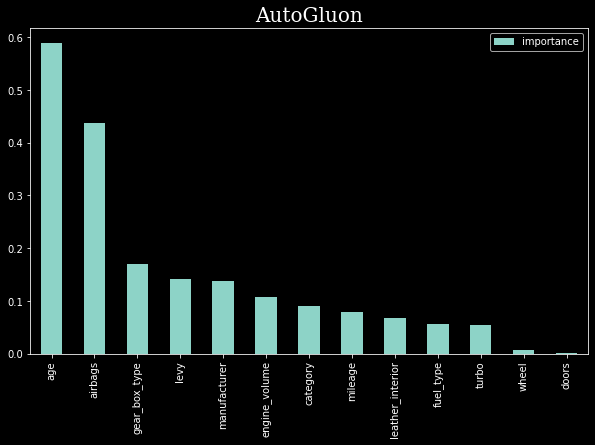

In [ ]:
df_feature_importance = pd.DataFrame(feature_importance_aut['importance'], 
                                     index = feature_importance_aut.index)


df_feature_importance.plot(kind='bar', figsize=[10,6])
font = {'family':'serif','color':'w','size':20}
plt.title('AutoGluon', fontdict=font);

## Вывод

Мы выполнили следующие этапы практической работы:

* Выбран набор данных от Kaggle
* Проведен разведочный анализ
* Очищены данные и убраны выбросы
* Оцифрованы категориальные признаки
* Подготовлена модель и обучена в следующих библиотеках:

    * Scikit-learn. Random Forest Regressor
    * Scikit-learn. Gradient Boosting Regressor
    * AutoGluon

Сделаем сводную таблицу по результатам тестирования.

In [ ]:
pd.DataFrame({'модель':['Random Forest Regressor','Gradient Boosting Regressor', 'AutoGluon'],
              'R2.обучение':[score_rf, score_gb, score_aut],
              'скорость':['средняя', 'высокая', 'низкая']})

,модель,R2.обучение,скорость
0,Random Forest Regressor,0.704098,средняя
1,Gradient Boosting Regressor,0.628246,высокая
2,AutoGluon,0.734969,низкая


Предсказание AutoGluon наиболее точные на обучении по метрике R2. Случайный лес предсказывает чуть хуже, но эта модель более простая и быстрее работает. Возьмем эти модели для теста на новых данных.

# Прогноз на новых данных

Выполним прогнозирование модели на новых данных. Необходимо сгенерировать выборку, используя исходные данные.

In [ ]:
# используя pandas: Случайная выборка DataFrame с заменой
new_data = cars.sample(frac=0.2, replace=False, random_state=RANDOM_STATE)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3847 entries, 14672 to 16644
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3847 non-null   object 
 1   Price             3844 non-null   float64
 2   Levy              3844 non-null   object 
 3   Manufacturer      3844 non-null   object 
 4   Model             3844 non-null   object 
 5   Prod. year        3844 non-null   float64
 6   Category          3844 non-null   object 
 7   Leather interior  3844 non-null   object 
 8   Fuel type         3844 non-null   object 
 9   Engine volume     3844 non-null   object 
 10  Mileage           3844 non-null   object 
 11  Cylinders         3844 non-null   float64
 12  Gear box type     3844 non-null   object 
 13  Drive wheels      3844 non-null   object 
 14  Doors             3844 non-null   object 
 15  Wheel             3844 non-null   object 
 16  Color             3844 non-null   obj

## Подготовка признаков

Выполним такую же предобработку данных и подготовим выборки для прогноза.

In [ ]:
new_data = new_data.drop(labels = 'ID', axis=1)

In [ ]:
new_data[new_data.isna().values.any(axis=1)]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
13328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data = new_data.dropna()
new_data.shape

(3844, 17)

In [ ]:
new_data['Doors'] = new_data['Doors'].str.replace('04-May','4-5')
new_data['Doors'] = new_data['Doors'].str.replace('02-Mar','2-3')
new_data['Doors'].value_counts()

4-5    3681
2-3     140
>5       23
Name: Doors, dtype: int64

In [ ]:
new_data["Levy"] = new_data["Levy"].replace({"-":"0"})
new_data['Levy'] = new_data['Levy'].apply(lambda x : int(x))
new_data['Levy'].describe()

count    3844.000000
mean      625.231270
std       535.620236
min         0.000000
25%         0.000000
50%       642.000000
75%       911.000000
max      5332.000000
Name: Levy, dtype: float64

In [ ]:
new_data['Age'] = new_data.apply(age, axis=1)

In [ ]:
new_data = new_data.drop(labels = 'Prod. year', axis=1)

In [ ]:
new_data['turbo'] = 'No'

In [ ]:
idx_turbo = new_data[new_data['Engine volume'].str.contains('Turbo')].index
print('Кол-во авто с двигателем Turbo:', len(idx_turbo))

Кол-во авто с двигателем Turbo: 389


In [ ]:
new_data.loc[idx_turbo, 'turbo'] = 'Yes'

In [ ]:
new_data[new_data['turbo'] == 'Yes'].shape[0]

389

In [ ]:
new_data['Engine volume'] = new_data['Engine volume'].apply(lambda x : str(x).replace(" Turbo",""))
new_data['Engine volume'] = new_data['Engine volume'].apply(lambda x : float(x))

In [ ]:
new_data['Mileage'] = new_data['Mileage'].apply(lambda x : str(x).replace("km"," "))
new_data['Mileage'] = new_data['Mileage'].astype(str).astype(int)

In [ ]:
new_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower().replace(' ', '_') for name in cars_upd.columns]
new_data.columns

Index(['price', 'levy', 'manufacturer', 'model', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags', 'age', 'turbo'],
      dtype='object')

In [ ]:
#удаляем столбцы
new_data = new_data.drop(['model', 'drive_wheels', 'color', 'cylinders'], axis=1)

In [ ]:
new_data.shape

(3844, 14)

In [ ]:
new_data = new_data.reset_index(drop=True)

In [ ]:
new_ordinal = new_data[category]
new_ordinal = pd.DataFrame(encoder.fit_transform(new_ordinal),
                            columns=new_ordinal.columns)

new_ordinal = new_ordinal.join(new_data[['price', 'levy', 'engine_volume', 
                                              'mileage','airbags', 'age']])

new_ordinal.head()

,manufacturer,category,leather_interior,fuel_type,gear_box_type,wheel,doors,turbo,price,levy,engine_volume,mileage,airbags,age
0,48.0,9.0,1.0,4.0,0.0,0.0,1.0,0.0,17876.0,584,1.8,97000,0.0,6.0
1,2.0,9.0,0.0,4.0,1.0,0.0,1.0,0.0,9095.0,0,2.8,55556665,6.0,18.0
2,13.0,6.0,0.0,1.0,1.0,0.0,1.0,1.0,12231.0,0,2.5,400000,2.0,21.0
3,18.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,26594.0,642,2.0,138525,4.0,8.0
4,18.0,9.0,1.0,1.0,0.0,0.0,1.0,0.0,24709.0,528,1.6,133480,4.0,6.0


In [ ]:
X_new = new_ordinal.drop('price',axis=1)
y_new = new_ordinal['price']

In [ ]:
pd.options.mode.chained_assignment = None

X_new_scaled = X_new.copy()

# scaling of numeric features
X_new_scaled[numeric] = scaler.transform(X_new_scaled[numeric])

X_new_scaled.head()

,manufacturer,category,leather_interior,fuel_type,gear_box_type,wheel,doors,turbo,levy,engine_volume,mileage,airbags,age
0,48.0,9.0,1.0,4.0,0.0,0.0,1.0,0.0,0.071879,-0.548070,-0.385071,-1.626594,-0.620884
1,2.0,9.0,0.0,4.0,1.0,0.0,1.0,0.0,-1.139354,0.797894,687.871891,-0.143750,1.533492
2,13.0,6.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.139354,0.394105,3.375173,-1.132313,2.072086
3,18.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.192172,-0.278877,0.130256,-0.638032,-0.261821
4,18.0,9.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.044267,-0.817263,0.067647,-0.638032,-0.620884


## Тест модели

Обучим модели на тестовой выборке и оценим качество их предсказаний на тесте по метрике R2 c помощью функции model_metrics.

Случайный лес:

In [ ]:
%%time

predict_rf_new = rf.predict(X_new_scaled)

score_rf_new = model_metrics(predict_rf_new, y_new)

The R-squared value: 0.4529
Mean Absolute Error: 4953.9
Root Mean Squared Error: 14736.3
Relative Absolute Error: 0.4118
Relative Squared Error: 0.5471
CPU times: user 159 ms, sys: 1.01 ms, total: 160 ms
Wall time: 164 ms


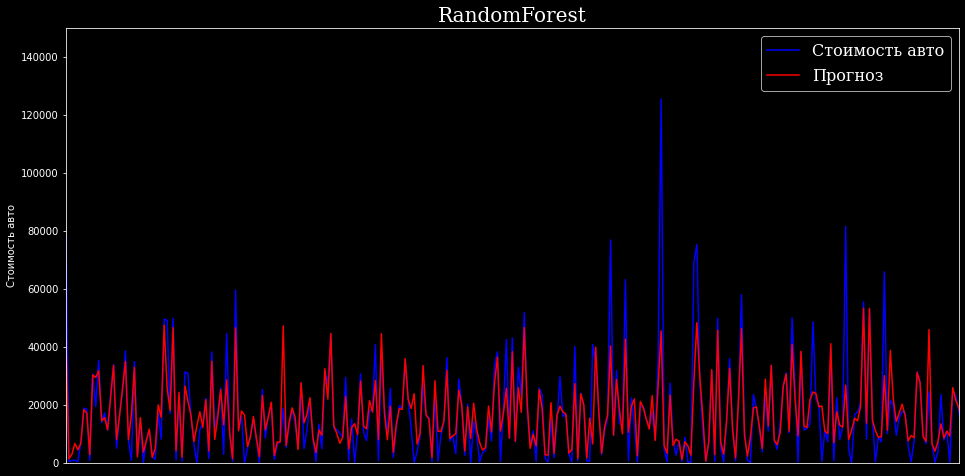

In [ ]:
# plot of target and predict
plt.figure(figsize=(16, 8))
plt.plot(y_new.index, 
         y_new, 
         'b-', label='Стоимость авто')

plt.plot(y_new.index, 
         predict_rf_new,
         'r-', label='Прогноз')

style = {'family':'serif','size':16}
plt.xlim(1700, 2000)
plt.ylim(0, 150000)
plt.xticks([])

plt.ylabel('Стоимость авто')
plt.legend(prop=style)
plt.title('RandomForest', fontdict=font);

AutoGluon:

In [ ]:
full_new =  X_new_scaled.join(y_new)

In [ ]:
%%time

predict_aut_new = predictor.predict(full_new, model='LightGBMXT_BAG_L2')

score_aut_new = model_metrics(predict_aut_new, full_new['price'])

The R-squared value: 0.4165
Mean Absolute Error: 6469.7
Root Mean Squared Error: 15219.1
Relative Absolute Error: 0.5378
Relative Squared Error: 0.5835
CPU times: user 7.15 s, sys: 69.4 ms, total: 7.22 s
Wall time: 4.26 s


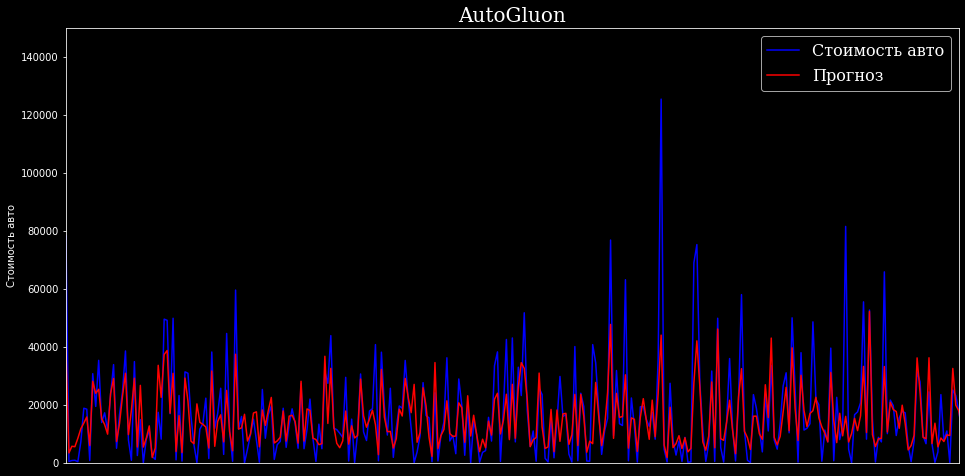

In [ ]:
# plot of target and predict
plt.figure(figsize=(16, 8))
plt.plot(y_new.index, 
         y_new, 
         'b-', label='Стоимость авто')

plt.plot(y_new.index, 
         predict_aut_new,
         'r-', label='Прогноз')

style = {'family':'serif','size':16}
plt.xlim(1700, 2000)
plt.ylim(0, 150000)
plt.xticks([])

plt.ylabel('Стоимость авто')
plt.legend(prop=style)
plt.title('AutoGluon', fontdict=font);

Модели плохо предсказывают из-за присутствия аномальных значений в новых данных.

## Подготовка очищенных данных

Выполним такую же очистку данных от выбросов и подготовим выборки для прогноза.

In [ ]:
new_filter = new_data.query('0<=age<41')

In [ ]:
new_filter = new_filter.query('1<engine_volume<7')

In [ ]:
new_filter = new_filter.query('levy<2500')

In [ ]:
new_filter = new_filter.query('mileage<385000')

In [ ]:
new_filter = new_filter.query('100<=price<=64000')
new_filter = new_filter.reset_index(drop=True)
new_filter.shape

(3522, 14)

In [ ]:
new_filter_ordinal = new_filter[category]
new_filter_ordinal = pd.DataFrame(encoder.fit_transform(new_filter_ordinal),
                            columns=new_filter_ordinal.columns)

new_filter_ordinal = new_filter_ordinal.join(new_filter[['price', 'levy', 'engine_volume', 
                                              'mileage','airbags', 'age']])

new_filter_ordinal.head()

,manufacturer,category,leather_interior,fuel_type,gear_box_type,wheel,doors,turbo,price,levy,engine_volume,mileage,airbags,age
0,44.0,9.0,1.0,4.0,0.0,0.0,1.0,0.0,17876.0,584,1.8,97000,0.0,6.0
1,16.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,26594.0,642,2.0,138525,4.0,8.0
2,16.0,9.0,1.0,1.0,0.0,0.0,1.0,0.0,24709.0,528,1.6,133480,4.0,6.0
3,41.0,9.0,0.0,4.0,0.0,1.0,1.0,0.0,7213.0,0,2.0,180000,0.0,21.0
4,41.0,9.0,1.0,4.0,2.0,0.0,1.0,0.0,22580.0,777,2.5,133000,10.0,6.0


In [ ]:
X_new_filt = new_filter_ordinal.drop('price',axis=1)
y_new_filt = new_filter_ordinal['price']

In [ ]:
pd.options.mode.chained_assignment = None

X_scld_flt = X_new_filt.copy()

# scaling of numeric features
X_scld_flt[numeric] = scaler.transform(X_scld_flt[numeric])

X_scld_flt.head()

,manufacturer,category,leather_interior,fuel_type,gear_box_type,wheel,doors,turbo,levy,engine_volume,mileage,airbags,age
0,44.0,9.0,1.0,4.0,0.0,0.0,1.0,0.0,0.071879,-0.548070,-0.385071,-1.626594,-0.620884
1,16.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.192172,-0.278877,0.130256,-0.638032,-0.261821
2,16.0,9.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.044267,-0.817263,0.067647,-0.638032,-0.620884
3,41.0,9.0,0.0,4.0,0.0,1.0,1.0,0.0,-1.139354,-0.278877,0.644963,-1.626594,2.072086
4,41.0,9.0,1.0,4.0,2.0,0.0,1.0,0.0,0.472166,0.394105,0.061690,0.844812,-0.620884


## Тест модели на очищенных данных

Обучим модели на тренировочной выборке и оценим качество их предсказаний на тесте по метрике R2 c помощью функции model_metrics.

Случайный лес:

In [ ]:
%%time

predict_rf_flt = rf.predict(X_scld_flt)

score_rf_flt = model_metrics(predict_rf_flt, y_new_filt)

The R-squared value: 0.7866
Mean Absolute Error: 3710.5
Root Mean Squared Error: 6031.9
Relative Absolute Error: 0.3661
Relative Squared Error: 0.2134
CPU times: user 131 ms, sys: 1.98 ms, total: 133 ms
Wall time: 140 ms


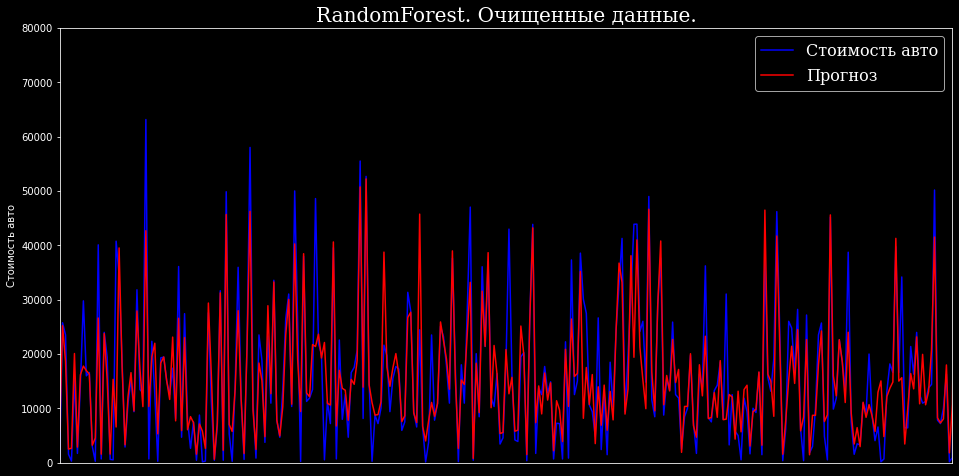

In [ ]:
# plot of target and predict
plt.figure(figsize=(16, 8))
plt.plot(y_new_filt.index, 
         y_new_filt, 
         'b-', label='Стоимость авто')

plt.plot(y_new_filt.index, 
         predict_rf_flt,
         'r-', label='Прогноз')

style = {'family':'serif','size':16}
plt.xlim(1700, 2000)
plt.ylim(0, 80000)
plt.xticks([])

plt.ylabel('Стоимость авто')
plt.legend(prop=style)
plt.title('RandomForest. Очищенные данные.', fontdict=font);

AutoGluon:

In [ ]:
full_new_flt =  X_scld_flt.join(y_new_filt)

In [ ]:
%%time
predict_aut_flt = predictor.predict(full_new_flt, model='LightGBMXT_BAG_L2')

score_aut_flt = model_metrics(predict_aut_flt, full_new_flt['price'])

The R-squared value: 0.6501
Mean Absolute Error: 5193.0
Root Mean Squared Error: 7723.5
Relative Absolute Error: 0.5123
Relative Squared Error: 0.3499
CPU times: user 6.71 s, sys: 45.4 ms, total: 6.75 s
Wall time: 3.83 s


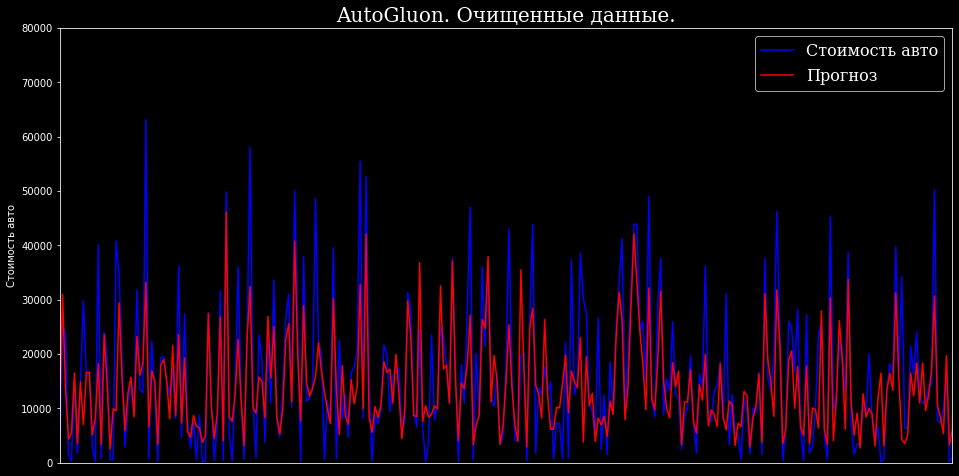

In [ ]:
# plot of target and predict
plt.figure(figsize=(16, 8))
plt.plot(y_new_filt.index, 
         y_new_filt, 
         'b-', label='Стоимость авто')

plt.plot(y_new_filt.index, 
         predict_aut_flt,
         'r-', label='Прогноз')

style = {'family':'serif','size':16}
plt.xlim(1700, 2000)
plt.ylim(0, 80000)
plt.xticks([])

plt.ylabel('Стоимость авто')
plt.legend(prop=style)
plt.title('AutoGluon. Очищенные данные.', fontdict=font);

# Вывод

В данном блокноте содержится практическая работа, в которой:

* Выбран набор данных от Kaggle
* Проведен разведочный анализ
* Очищены данные и убраны выбросы
* Оцифрованы категориальные признаки
* Числовые признаки приведены к одному масштабу
* Подготовлена модель и обучена в следующих библиотеках:
    * Scikit-learn. Random Forest Regressor
    * AutoGluon
* Выполнен тест модели на новых данных.

Составлена сводная таблица по результатам исследования.

In [ ]:
pd.DataFrame({'модель':['Random Forest Regressor', 'AutoGluon. LightGBMXT_BAG_L2'],
              'R2.обучение':[score_rf, score_aut],
              'R2.тест':[score_rf_new, score_aut_new],
              'R2.тест(без выброов)':[score_rf_flt, score_aut_flt],
              'скорость':['быстрая', 'средняя']})

,модель,R2.обучение,R2.тест,R2.тест(без выброов),скорость
0,Random Forest Regressor,0.704098,0.452922,0.786585,быстрая
1,AutoGluon. LightGBMXT_BAG_L2,0.734969,0.416488,0.650093,средняя


Предсказание AutoGluon наиболее точные на обучении по метрике R2. Но Случайный лес предсказывает чуть лучше на тесте, к тому же эта модель более простая и быстрее работает. Выберем Случайный лес, как самую оптимальную модель для предсказания стоимости автомобиля.